<a href="https://colab.research.google.com/github/JagtapT/Deep-Learning-6th-July/blob/main/Handwritten_Digits_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Handwritten Digit Classification Project

In [2]:
from warnings import filterwarnings
filterwarnings('ignore')

## Load the MNIST dataset

In [3]:
from keras.datasets import mnist
(xtrain, ytrain), (xtest, ytest) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [4]:
xtrain.shape

(60000, 28, 28)

In [5]:
ytrain.shape

(60000,)

In [6]:
xtrain

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [7]:
ytrain

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

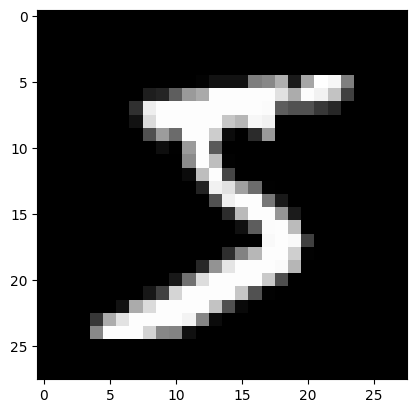

In [8]:
import matplotlib.pyplot as plt
plt.imshow(xtrain[0], cmap='gray')

## Displaying first 9 images from the train data

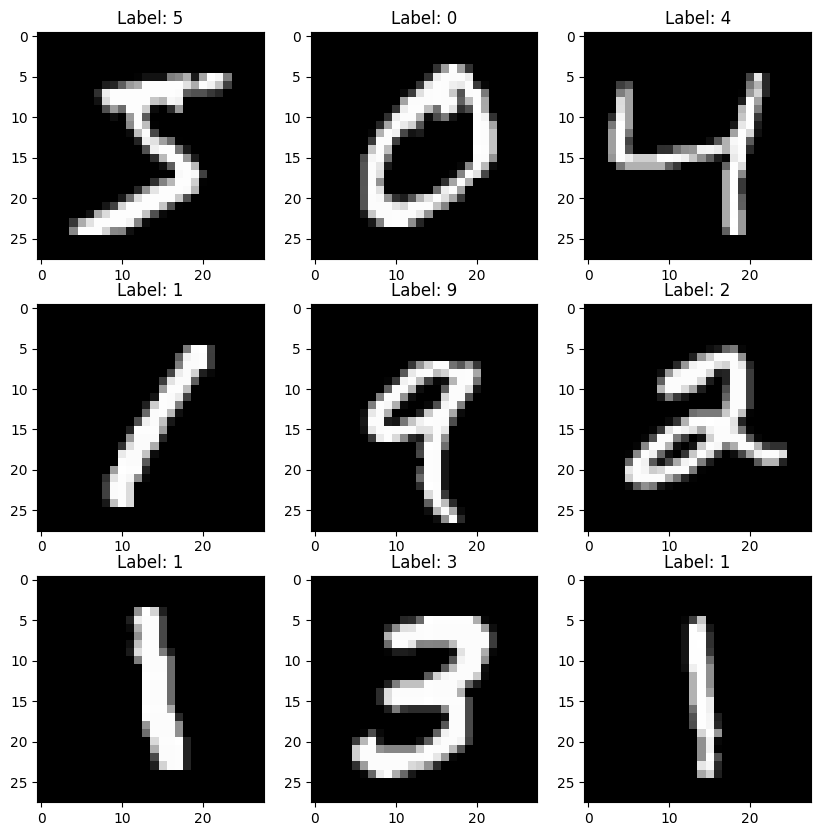

In [9]:
plt.figure(figsize=(10,10))
for i in range(9):
  plt.subplot(3,3, i+1)
  plt.imshow(xtrain[i], cmap='gray')
  plt.title(f"Label: {ytrain[i]}")


## This is multiclass classification problem

### Preprocess data image

#### Pixel value : 0 - 255

In [10]:
xtrain_scale = xtrain.astype("float32")/255
xtest_scale = xtest.astype("float32")/255

In [11]:
xtrain_scale

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

## Onehot encode your Y features

In [12]:
from keras.utils import to_categorical
ytrain_cat = to_categorical(ytrain)
ytest_cat = to_categorical(ytest)

In [13]:
ytrain_cat

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

## Build the neural network

In [14]:
from keras.models import Sequential
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, Flatten, Dropout

In [15]:
model = Sequential()

# Add input layer
model.add(Input(shape=(28,28,1)))

# Add convolution layer 1
model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu'))

# Add Max pooling layer 1
model.add(MaxPooling2D(pool_size=(2,2)))

# Add convolution layer 2
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))

# Add Max pooling layer 2
model.add(MaxPooling2D(pool_size=(2,2)))

# Add Flatten layer
model.add(Flatten())

# Add dropout layer
model.add(Dropout(0.5))

# Add output layer
model.add(Dense(ytrain_cat.shape[1], activation='softmax'))

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dropout (Dropout)           (None, 1600)              0

In [17]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [18]:
hist = model.fit(xtrain_scale, ytrain_cat, epochs=15, validation_split=0.1)

Epoch 1/15
1688/1688 [==============================] - 49s 29ms/step - loss: 0.2154 - accuracy: 0.9330 - val_loss: 0.0624 - val_accuracy: 0.9817
Epoch 2/15
1688/1688 [==============================] - 48s 29ms/step - loss: 0.0820 - accuracy: 0.9740 - val_loss: 0.0471 - val_accuracy: 0.9860
Epoch 3/15
1688/1688 [==============================] - 54s 32ms/step - loss: 0.0648 - accuracy: 0.9794 - val_loss: 0.0356 - val_accuracy: 0.9900
Epoch 4/15
1688/1688 [==============================] - 46s 27ms/step - loss: 0.0565 - accuracy: 0.9821 - val_loss: 0.0342 - val_accuracy: 0.9893
Epoch 5/15
1688/1688 [==============================] - 45s 27ms/step - loss: 0.0471 - accuracy: 0.9850 - val_loss: 0.0385 - val_accuracy: 0.9892
Epoch 6/15
1688/1688 [==============================] - 45s 27ms/step - loss: 0.0435 - accuracy: 0.9867 - val_loss: 0.0331 - val_accuracy: 0.9903
Epoch 7/15
1688/1688 [==============================] - 50s 30ms/step - loss: 0.0404 - accuracy: 0.9870 - val_loss: 0.0332 -

## Plot the learning curve

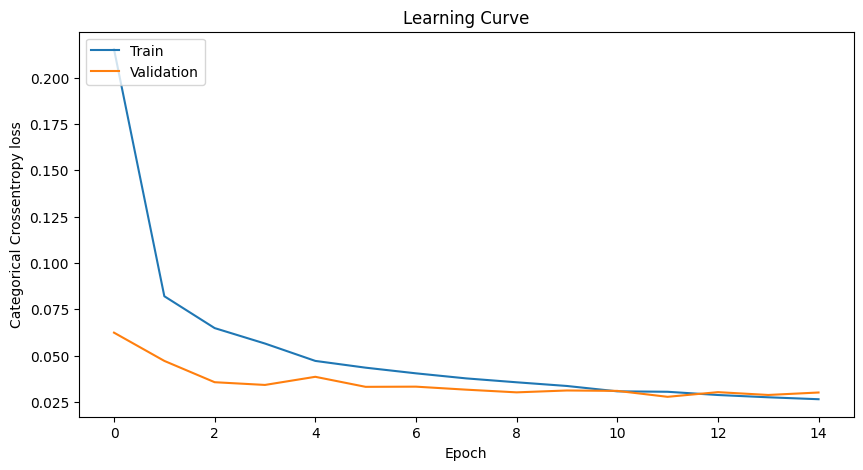

In [19]:
plt.figure(figsize=(10,5))
plt.plot(hist.history['loss'], label= 'Train Loss')
plt.plot(hist.history['val_loss'], label=' Validation Loss')
plt.title('Learning Curve')
plt.ylabel('Categorical Crossentropy loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

## Evaluate the model in train and test

In [20]:
model.evaluate(xtrain_scale, ytrain_cat)

1875/1875 [==============================] - 16s 9ms/step - loss: 0.0111 - accuracy: 0.9968


[0.011058847419917583, 0.9967666864395142]

In [ ]:
model.evaluate(xtest_scale, ytest_cat)

## PRedict the results for train and test data

In [ ]:
yprob_train = model.predict(xtrain_scale)
yprob_test = model.predict(xtest_scale)

In [23]:
yprob_train[0:5]

array([[1.0053261e-11, 3.7696690e-13, 2.1854093e-11, 1.7091362e-03,
        1.6444483e-13, 9.9829042e-01, 2.2661974e-12, 1.3911684e-09,
        1.4889888e-07, 3.0953180e-07],
       [9.9999851e-01, 1.2494136e-14, 3.9112871e-07, 1.5195114e-11,
        5.9919604e-12, 1.5209622e-10, 3.1672937e-07, 1.3484425e-12,
        1.4317376e-08, 6.6086778e-07],
       [9.0922899e-16, 3.8255690e-10, 6.7844858e-10, 1.1172979e-12,
        9.9999934e-01, 1.2182505e-11, 3.3548004e-13, 1.2181786e-07,
        8.2422857e-10, 4.4638998e-07],
       [3.2668073e-08, 9.9991065e-01, 2.0930408e-06, 3.3074940e-10,
        7.2411283e-05, 1.2693663e-08, 1.3545688e-06, 1.0138225e-05,
        3.0885151e-06, 9.6424962e-08],
       [2.1401496e-12, 4.4502528e-14, 1.0234720e-09, 2.3245326e-09,
        1.4280206e-04, 1.1183093e-09, 2.6438738e-14, 1.1717842e-08,
        5.5851760e-06, 9.9985170e-01]], dtype=float32)

In [24]:
import numpy as np
ypred_train = np.argmax(yprob_train, axis=1)
ypred_test = np.argmax(yprob_test, axis=1)

In [25]:
ypred_train[0:5]

array([5, 0, 4, 1, 9])

In [26]:
ytrain[0:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [27]:
ypred_test[0:5]

array([7, 2, 1, 0, 4])

In [28]:
ytest[0:5]

array([7, 2, 1, 0, 4], dtype=uint8)

## Plot the confusion matrix

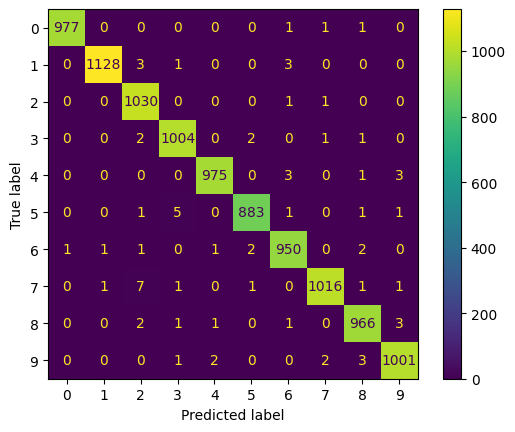

In [29]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(ytest, ypred_test)

In [30]:
from sklearn.metrics import classification_report
print(classification_report(ytest, ypred_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       980
           1       1.00      0.99      1.00      1135
           2       0.98      1.00      0.99      1032
           3       0.99      0.99      0.99      1010
           4       1.00      0.99      0.99       982
           5       0.99      0.99      0.99       892
           6       0.99      0.99      0.99       958
           7       1.00      0.99      0.99      1028
           8       0.99      0.99      0.99       974
           9       0.99      0.99      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



## Save above model for future use

In [31]:
model.save('Digit_model.keras')

## for Loading this model

In [33]:
from keras.models import load_model
nn = load_model('/content/Digit_model.keras')
nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dropout (Dropout)           (None, 1600)              0